# **Cargar dataset y librerias**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [56]:
sns.set_theme(style="whitegrid")

In [57]:
metadata_attributes_df = pd.read_excel('../datos/otros_labels/Metadata_Attributes.xlsx')
train_label_summary_df = pd.read_excel('../datos/otros_labels/train_label_summary.xlsx')
train_metadata_df = pd.read_csv('../datos/otros_labels/train_metadata.csv')
train_reports_df = pd.read_csv('../datos/otros_labels/train_reports.csv')


In [58]:
metadata_attributes_df.head()

,Attribute,Explanation
0,VolumeName,The file name.
1,Manufacturer,Manufacturer of the equipment that produced th...
2,SeriesDescription,Description of the Series.
3,ManufacturerModelName,Manufacturer's model name of the equipment tha...
4,PatientSex,Sex of the named Patient.


In [59]:
train_label_summary_df.head()

,Patient ID,Spleen,Kidney R,Kidney L,Gallbladder,Liver,Stomach,Aorta,Inferior vena cava,Portal vein and splenic vein,...,Subcutaneous tissue,Muscle,Abdominal cavity,Thoracic cavity,Bones,Gland structure,Pericardium,Prosthetic breast implant,Mediastinum,Spinal cord
0,train_10000_a_2,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0
1,train_10001_a_2,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0
2,train_10002_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,1.0,1.0,1.0
3,train_10003_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,1.0,1.0,1.0
4,train_10004_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0


In [60]:
train_metadata_df.head()

,VolumeName,Manufacturer,SeriesDescription,ManufacturerModelName,PatientSex,PatientAge,ReconstructionDiameter,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,...,PhotometricInterpretation,Rows,Columns,XYSpacing,RescaleIntercept,RescaleSlope,RescaleType,NumberofSlices,ZSpacing,StudyDate
0,train_1_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.82090625, 0.82090625]",-8192,1,HU,303,1.00,20220110
1,train_1_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.82090625, 0.82090625]",-8192,1,HU,303,1.00,20220110
2,train_2_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.712890625, 0.712890625]",-8192,1,HU,306,1.00,20211116
3,train_2_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.712890625, 0.712890625]",-8192,1,HU,306,1.00,20211116
4,train_3_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Bl56 S3",SOMATOM go.All,M,073Y,389.651856,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.7610390625, 0.7610390625]",-8192,1,HU,270,1.25,20220608


In [61]:
train_reports_df.head()

,VolumeName,ClinicalInformation_EN,Technique_EN,Findings_EN,Impressions_EN
0,train_1_a_1.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Multiple venous collaterals are present in the...,Multiple venous collaterals in the anterior l...
1,train_1_a_2.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Multiple venous collaterals are present in the...,Multiple venous collaterals in the anterior l...
2,train_2_a_1.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Trachea and both main bronchi were in the midl...,Emphysematous and passive atelectatic changes...
3,train_2_a_2.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Trachea and both main bronchi were in the midl...,Emphysematous and passive atelectatic changes...
4,train_3_a_1.nii.gz,Kidney transplant candidate.,Non-contrast images were taken in the axial pl...,Right thyroid lobe sizes increased. Evaluation...,Calcific atheromatous plaques in coronary art...


# **Limpieza de datos**

In [62]:
# Limpieza train_metadata_df
if "PatientAge" in train_metadata_df.columns:
    train_metadata_df["PatientAge"] = train_metadata_df["PatientAge"].astype(str).str.replace("Y", "")
    train_metadata_df["PatientAge"] = pd.to_numeric(train_metadata_df["PatientAge"], errors="coerce")
    train_metadata_df.loc[(train_metadata_df["PatientAge"] < 0) | (train_metadata_df["PatientAge"] > 120), "PatientAge"] = np.nan

if "PatientSex" in train_metadata_df.columns:
    train_metadata_df["PatientSex"] = train_metadata_df["PatientSex"].fillna("Unknown")

num_cols = ["ReconstructionDiameter", "DistanceSourceToDetector", "DistanceSourceToPatient"]
for col in num_cols:
    if col in train_metadata_df.columns:
        train_metadata_df[col] = pd.to_numeric(train_metadata_df[col], errors="coerce")

if "VolumeName" in train_metadata_df.columns:
    train_metadata_df = train_metadata_df.drop_duplicates(subset="VolumeName")

# Limpieza train_reports_df
clinical_cols = ["ClinicalInformation_EN", "Technique_EN", "Findings_EN", "Impressions_EN"]
for col in clinical_cols:
    if col in train_reports_df.columns:
        train_reports_df[col] = train_reports_df[col].replace("Not given.", pd.NA)

if "VolumeName" in train_reports_df.columns:
    train_reports_df = train_reports_df.drop_duplicates(subset="VolumeName")

# Limpieza train_label_summary_df
if "VolumeName" in train_label_summary_df.columns:
    train_label_summary_df = train_label_summary_df.drop_duplicates(subset="VolumeName")

In [63]:
# Limpieza de PatientAge
if "PatientAge" in train_metadata_df.columns and train_metadata_df["PatientAge"].isna().all():
    raw_age = pd.read_csv("../datos/otros_labels/train_metadata.csv", usecols=["VolumeName","PatientAge"])
    raw_age["VolumeName"] = raw_age["VolumeName"].astype(str).str.strip()
    train_metadata_df["VolumeName"] = train_metadata_df["VolumeName"].astype(str).str.strip()
    train_metadata_df = (
        train_metadata_df.drop(columns=["PatientAge"], errors="ignore")
        .merge(raw_age, on="VolumeName", how="left")
    )

# 1) Extraer numeros desde el texto (ej. "049Y" -> "049")
train_metadata_df["PatientAge"] = (
    train_metadata_df["PatientAge"]
    .astype("string")         
    .str.strip()
    .str.extract(r"(\d{1,3})", expand=False) 
)

# 2) Convertira entero
train_metadata_df["PatientAge"] = pd.to_numeric(
    train_metadata_df["PatientAge"], errors="coerce"
).astype("Int64")


print("Muestra de PatientAge ya limpia:")
display(train_metadata_df["PatientAge"].head(5))
print("% nulos en PatientAge:", (train_metadata_df["PatientAge"].isna().mean()*100).round(2))

Muestra de PatientAge ya limpia:


0    49
1    49
2    45
3    45
4    73
Name: PatientAge, dtype: Int64

% nulos en PatientAge: 0.04


**Nota**: En la limpieza de `PatientAge`, se asume que los valores están en un formato como "049Y" o "30Y". El código extrae solo los números y los convierte a enteros, manejando valores no numéricos como nulos.

In [64]:
# 1) Unificacion de datasets (reports + metadata + labels)
df_full = train_reports_df.merge(train_metadata_df, on="VolumeName", how="inner")
if "VolumeName" in train_label_summary_df.columns:
    df_full = df_full.merge(train_label_summary_df, on="VolumeName", how="left")

print("Dimensiones df_full:", df_full.shape)

Dimensiones df_full: (47149, 48)


# **EDA**

In [65]:
faltantes_pct = (df_full.isna().mean().sort_values(ascending=False) * 100).round(2)
faltantes_pct = faltantes_pct[faltantes_pct > 0]
print("Top 10 columnas con mayor % de nulos:")
display(faltantes_pct.head(10))
print("Duplicados por VolumeName (post-merge):", df_full.duplicated(subset="VolumeName").sum())

Top 10 columnas con mayor % de nulos:


RescaleType                          66.49
DataCollectionCenterPatient          66.19
FocalSpots                           66.18
ReconstructionTargetCenterPatient    66.18
GeneratorPower                       66.18
TotalCollimationWidth                56.80
SingleCollimationWidth               56.80
RevolutionTime                       56.63
DistanceSourceToPatient              52.06
DistanceSourceToDetector             52.06
dtype: float64

Duplicados por VolumeName (post-merge): 0


In [66]:
print("Distribución de sexo:")
display(df_full["PatientSex"].value_counts(dropna=False))

Distribución de sexo:


PatientSex
M          27462
F          19681
Unknown        6
Name: count, dtype: int64

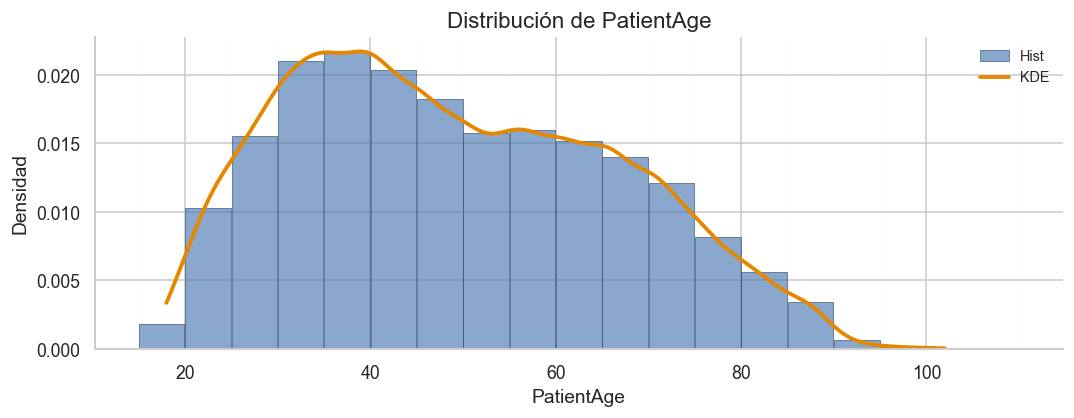

In [67]:
ages = df_full["PatientAge"].dropna().values

sns.set_style("whitegrid")

plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.dpi": 115,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.frameon": False
})

age_min = max(0, np.floor(ages.min()/5)*5)
age_max = np.ceil(ages.max()/5)*5 + 5
bins = np.arange(age_min, age_max + 1e-9, 5)

plt.figure(figsize=(9.5, 3.8))

plt.hist(
    ages,
    bins=bins,
    density=True,
    rwidth=0.98,
    color="#4b78b4",
    edgecolor="#2f4d70",
    linewidth=0.6,
    alpha=0.65,
    label="Hist"
 )
        
if np.unique(ages).size > 1:
    sns.kdeplot(
    ages,
    color="#e68700",
    lw=2.4,
    bw_adjust=0.9,
    clip=(ages.min(), ages.max()),
    label="KDE"
)

plt.title("Distribución de PatientAge")
plt.xlabel("PatientAge")
plt.ylabel("Densidad")
plt.minorticks_on()
plt.grid(axis="x", which="minor", alpha=0.07, lw=0.4)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


**Analisis:** La mayoría de los pacientes está en edades adultas medias: el pico se concentra aproximadamente entre los 30 y 45 años. A partir de ahí la frecuencia va bajando de forma continua: hay todavía un grupo importante entre 50 y 70, y menos casos en edades muy avanzadas (80+). Hay pocos pacientes muy jóvenes (menores de 20) y muy pocos por encima de 90. En conjunto: población predominantemente adulta, con presencia decreciente hacia edades mayores.

In [68]:
grupos = pd.cut(df_full["PatientAge"], bins=[0,18,40,60,80,120], right=True, include_lowest=True)
print("Conteo por rangos de edad y sexo:")
display(pd.crosstab(grupos, df_full["PatientSex"]))

Conteo por rangos de edad y sexo:


PatientSex,F,M,Unknown
PatientAge,,,
"(-0.001, 18.0]",55,117,0
"(18.0, 40.0]",7240,10233,0
"(40.0, 60.0]",6341,9891,6
"(60.0, 80.0]",4978,6283,0
"(80.0, 120.0]",1059,927,0


**Análisis:** Mayoría de pacientes entre 18 y 60 años (grupo principal). Los hombres superan a las mujeres en todos los rangos salvo en el más anciano (80+), donde las mujeres son ligeramente más numerosas. Muy pocos menores de 18. A partir de 60 años el número cae. Casos con sexo desconocido son insignificantes (solo 6 en 40–60).

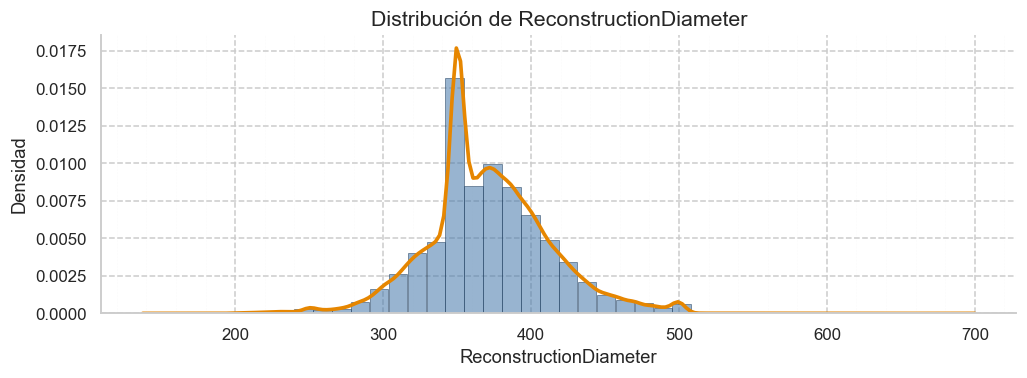

In [69]:
col = "ReconstructionDiameter"

if col in df_full.columns:
    x = df_full[col].dropna().astype(float)

    bins = np.linspace(x.min(), x.max(), 45)

    sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.alpha': 0.25})
    plt.rcParams.update({
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "figure.dpi": 110,
        "legend.frameon": False
    })

    plt.figure(figsize=(9.5, 3.6))

    plt.hist(
        x,
        bins=bins,
        density=True,
        rwidth=0.98,
        color="#4477aa",
        alpha=0.55,
        edgecolor="#1f3d5c",
        linewidth=0.6
    )

    if x.nunique() > 1:
        sns.kdeplot(
            x,
            color="#e68600",
            lw=2.4,
            bw_adjust=0.9,
            clip=(x.min(), x.max())
        )

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")

    plt.minorticks_on()
    plt.grid(True, which="minor", axis="x", alpha=0.08, lw=0.4)

    plt.tight_layout()
    plt.show()

**¿Qué es Reconstruction Diameter?** es el diámetro (en mm) del área reconstruida en la imagen (el campo circular que el sistema forma a partir de los datos). En términos simples: cuánto “ancho” de la anatomía se incluyó al generar la imagen. Valores muy grandes o muy pequeños pueden indicar configuraciones específicas del estudio o necesidades particulares del paciente.


**Análisis:** La gráfica muestra cómo se distribuyen los valores de ReconstructionDiameter: la mayoría se concentra en la zona central y pocos casos aparecen muy alejados hacia valores mayores. La curva naranja suaviza el perfil formado por las barras y confirma un pico principal claro con una caída progresiva a la derecha.


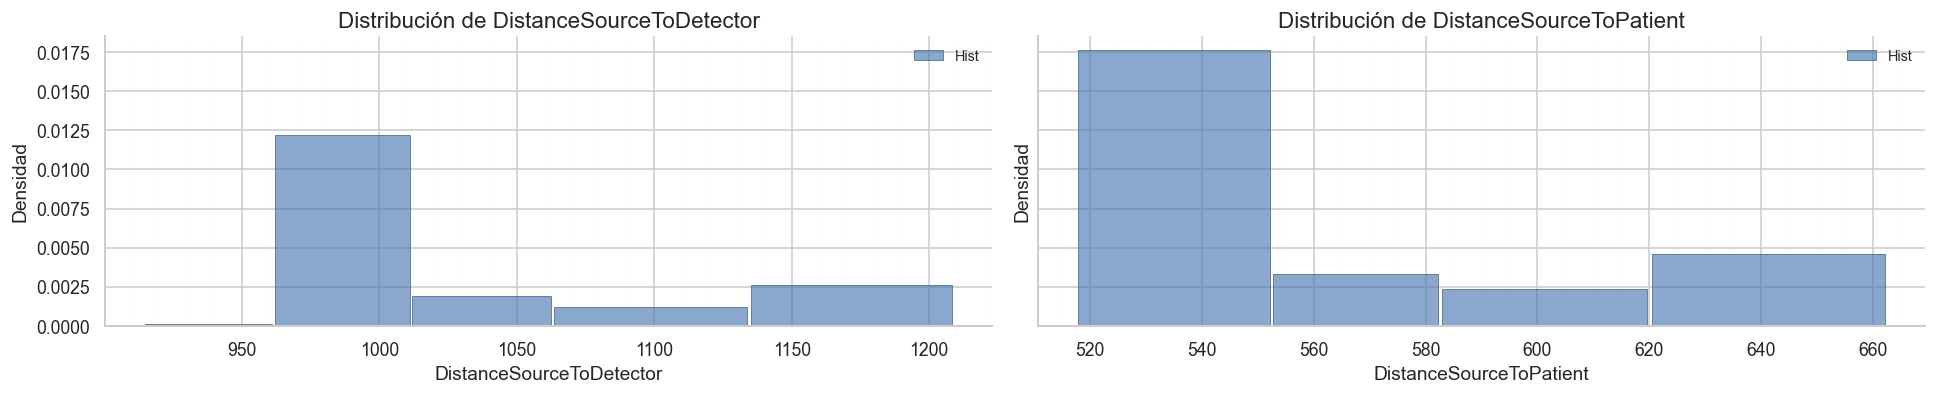

In [70]:
cols = ["DistanceSourceToDetector", "DistanceSourceToPatient"]

# Estilo general
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.dpi": 115,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.frameon": False
})

fig, axes = plt.subplots(1, len(cols), figsize=(len(cols)*8.5, 3.6), sharey=True)

if len(cols) == 1:
    axes = [axes]

for ax, col in zip(axes, cols):
    if col not in df_full.columns:
        ax.text(0.5, 0.5, f"No existe la columna\n{col}", ha="center", va="center")
        ax.set_axis_off()
        continue

    x = df_full[col].dropna().astype(float).values
    if x.size == 0:
        ax.text(0.5, 0.5, f"Sin datos válidos\n{col}", ha="center", va="center")
        ax.set_axis_off()
        continue

    u = np.sort(np.unique(x))

    if len(u) == 1:
        bins = np.linspace(u[0] - 0.5, u[0] + 0.5, 3)
    elif len(u) <= 25:
        diffs = np.diff(u)
        paso = np.median(diffs) if len(diffs) else 1.0
        mids = (u[:-1] + u[1:]) / 2
        bins = np.concatenate(([u[0] - paso/2], mids, [u[-1] + paso/2]))
    else:
        bins = np.linspace(x.min(), x.max(), 40)

    ax.hist(
        x,
        bins=bins,
        density=True,
        rwidth=0.98,
        color="#4b78b4",
        edgecolor="#2f4d70",
        linewidth=0.6,
        alpha=0.65,
        label="Hist"
    )

    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Densidad")
    ax.minorticks_on()
    ax.grid(axis="x", which="minor", alpha=0.07, lw=0.4)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

**¿Qué es Distance Source To Detector?** Es la distancia entre el foco del tubo de rayos X y el detector (similar al SID). La distribución tiene pocos valores repetidos en “bloques”, lo que indica que el equipo emplea configuraciones fijas. La mayor parte de los exámenes se hace con una o dos posiciones principales y algunos con distancias mayores para necesidades específicas del protocolo.

**¿Qué es Distance Source To Patient?** Es la distancia entre el tubo y el paciente (relacionada con la SSD). También aparecen valores discretos, mostrando que se usan alturas o posiciones estándar de la mesa/gantry. La mayoría de los estudios cae en un rango compacto y unos pocos requieren más separación (por el tamaño del paciente o ajuste técnico).

**Análisis:**
1) Grafica Distancia Source to Detector (DistanceSourceToDetector):
La gráfica muestra cómo se repiten unos pocos valores concretos de la distancia entre el tubo y el detector del equipo. No es una distribución continua: se observan “bloques” separados, lo que indica que la máquina usa un conjunto reducido de configuraciones fijas (protocolos o presets). La mayor parte de los estudios cae en el grupo central y unos pocos en posiciones más largas; esto sugiere distintos modos o tamaños de campo seleccionados según el examen.

2) Distancia Source to Patient (DistanceSourceToPatient):
Aquí también predominan unos pocos valores discretos de la distancia entre el tubo y el paciente (generalmente el punto isocéntrico). Esa repetición de escalones indica ajustes estándar de posicionamiento o alturas de mesa predefinidas. La mayoría de los casos se concentra en el tramo inferior–medio y solo algunos se extienden a distancias mayores, posiblemente por variaciones en el grosor del paciente o en el protocolo aplicado. En resumen: ambas gráficas reflejan parámetros geométricos con valores casi “categóricos” más que una variación continua.
